# Recovery of gold from ore

Prepare a prototype machine learning model for Zifra. The company develops solutions for the efficient operation of industrial enterprises.

The model should predict the recovery rate of gold from gold ore. Use data with mining and cleaning parameters.

The model will help optimize production so as not to launch an enterprise with unprofitable characteristics.

You need:

1. Prepare data;
2. Conduct exploratory data analysis;
3. Build and train the model.

Refer to the *pandas*, *matplotlib* and *sklearn.* libraries to complete the project. Their documentation will help you.

<font size=4><b>Data Description </font></b>

<b>Technological process</b>
- `Rougher feed` - feedstock
- `Rougher additions` (or reagent additions) - flotation reagents: Xanthate, Sulphate, Depressant
- `Xanthate` - xanthate (promoter, or flotation activator);
- `Sulphate` - sulfate (in this production, sodium sulfide);
- `Depressant` - depressant (sodium silicate).
- `Rougher process` (English "rough process") - flotation
- `Rougher tails` - dump tails
- `Float banks` - flotation unit
- `Cleaner process` - cleaning
- `Rougher Au` - rough gold concentrate
- `Final Au` - final gold concentrate

<b>Stage parameters</b>
- `air amount` - air volume
- `fluid levels` - fluid level
- `feed size` — size of feed granules
- `feed rate` — feed rate

<b>Name of signs</b>
    
    The name of the features should be:
    [stage].[parameter_type].[parameter_name]
    Example: rougher.input.feed_ag
Possible values for block [stage]:
- `rougher` - flotation
- `primary_cleaner` - primary cleaning
- `secondary_cleaner` - secondary cleaning
- `final` - final characteristics
Possible values for block [parameter_type]:
- `input` — raw material parameters
- `output` — product parameters
- `state` — parameters characterizing the current state of the stage
- `calculation` — calculated characteristics

## Data preparation

In [1]:
#import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

import warnings
warnings.filterwarnings("ignore")

### Let's download our datasets and study them.

In [2]:
df_train=pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test=pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full=pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
#training set
df_train.sample(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
7110,2017-04-26 04:59:59,4.739294,11.429776,10.917536,44.751161,67.819950,7.917520,2.897718,11.362627,2.476118,...,25.022697,-399.359066,23.014381,-401.643835,25.986139,-449.535871,23.980067,-449.963188,29.983001,-499.733962
9371,2017-08-14 13:59:59,4.146732,12.258958,6.588644,45.568230,58.451934,7.330122,4.352353,11.610819,3.844961,...,14.491141,-496.034882,10.933114,-400.526508,13.993115,-501.986808,11.027800,-490.753082,15.007717,-500.975730
10708,2018-03-02 01:59:59,5.630798,9.087935,7.728026,45.848497,82.410431,11.064872,1.854523,9.533747,2.111315,...,23.038633,-499.136165,14.905711,-499.707745,17.997966,-500.146531,11.995316,-500.080325,11.991255,-500.139998
8179,2017-06-22 21:59:59,4.392976,10.307967,7.982713,46.500742,60.680880,7.988811,2.744073,9.989456,2.616254,...,17.966142,-500.696054,13.000774,-378.990232,17.991933,-500.564871,12.954428,-500.084513,15.031805,-500.812208
9116,2017-08-03 08:59:59,4.125936,12.279839,7.182092,43.283941,63.900497,7.020990,2.972639,10.590239,2.694817,...,12.956764,-500.618027,9.958967,-400.223280,11.027740,-500.570397,9.005407,-500.010508,11.992647,-499.959797
11588,2018-04-14 14:59:59,5.065759,10.120619,8.418366,46.082425,73.247413,13.708169,4.290441,7.427641,3.859482,...,23.007960,-499.749842,15.944663,-500.055470,18.016808,-500.153581,11.989890,-500.133370,14.992885,-500.430278
9620,2017-08-25 04:59:59,3.780079,11.014068,7.650390,46.470614,64.267521,7.492244,3.029109,10.471294,2.290094,...,14.507842,-501.521336,10.971956,-401.586911,13.996969,-501.058801,11.009226,-499.983335,15.008976,-500.397137
5147,2017-01-26 17:59:59,4.855644,8.470465,14.549406,46.365969,70.450308,10.390029,2.316145,11.614787,2.764194,...,21.051144,-500.560153,21.081949,-499.906959,23.008898,-499.629288,20.028300,-500.040448,25.011028,-599.830110
1392,2016-03-19 17:00:00,5.182911,11.070075,8.178016,42.374954,73.178089,11.689246,2.034504,16.457291,2.837874,...,11.975794,-500.799122,12.057243,-499.912854,11.946417,-500.431818,10.009150,-499.966885,19.954936,-499.739188
97,2016-01-20 16:00:00,6.641615,8.990178,NaN,44.161305,64.045287,12.460954,1.905541,4.360854,3.075640,...,13.977521,-550.386614,12.000013,-550.451984,9.963179,-500.873518,8.051530,-499.780601,11.956762,-599.938457


In [4]:
#training set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
print('Rows, columns in the training sample:', df_train.shape)
print('Number of gaps in the training set:', df_train.duplicated().sum())

Rows, columns in the training sample: (14149, 87)
Number of gaps in the training set: 0


The training sample contains 14149 rows and 87 columns, some columns have gaps, there are no duplicates in the training dataset. All features, except for the date column, have the data type `float64`.

In [6]:
#test set
df_test.sample(10)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
4052,2017-11-06 22:59:59,209.022333,9.902682,6.06,2.136155,1600.846311,-499.126554,1602.485329,-495.316956,1498.457946,...,21.035201,-499.861146,18.992534,-499.837546,14.977894,-500.493057,10.739988,-499.791331,16.008219,-499.758430
1603,2016-11-17 21:59:59,198.939953,9.045445,7.31,1.295780,1596.659871,-499.904189,1602.869473,-499.764414,1600.651979,...,15.976558,-500.085141,13.982873,-496.343858,16.183099,-499.740854,13.985090,-499.956737,21.999183,-499.285569
4003,2017-11-04 16:59:59,165.732867,10.055889,6.22,2.399743,1600.709681,-500.193120,1599.432946,-497.691892,1521.047497,...,20.017685,-499.909662,17.941286,-499.863393,14.017193,-499.391497,10.027675,-499.799905,14.006807,-500.062543
3836,2017-10-28 16:59:59,99.332190,8.445943,6.82,1.753049,1597.538344,-500.185875,1601.025915,-502.861397,1600.864170,...,18.012991,-500.979304,16.094022,-500.106464,15.014246,-500.080236,10.982499,-500.116136,15.997517,-499.877206
1088,2016-10-26 11:59:59,150.032409,5.478359,7.10,0.698515,1612.586060,-499.593440,1699.790915,-500.507830,1700.839811,...,20.010274,-500.018624,17.067633,-499.697293,16.989144,-500.343614,14.010132,-494.957502,25.005508,-498.730209
3455,2017-10-11 05:59:59,173.027055,7.012145,6.51,2.315499,1403.920470,-500.041790,1400.881509,-496.599522,1396.890964,...,18.006338,-501.496274,15.984915,-400.294843,12.989143,-500.214602,10.000137,-499.674221,13.998606,-499.835755
3818,2017-10-27 22:59:59,229.767535,13.977277,6.41,2.041729,1597.741407,-500.096218,1600.788220,-502.628161,1599.885761,...,18.003162,-501.953984,16.028517,-501.211807,14.977547,-500.432245,10.969379,-499.942006,15.981079,-499.608890
3928,2017-11-01 12:59:59,204.203950,9.000325,7.49,3.296680,1800.491247,-496.285383,1784.201672,-503.100053,1334.752364,...,18.051130,-500.297033,16.002175,-500.952289,14.990877,-499.515130,10.984340,-500.210509,15.976134,-500.508675
2056,2016-12-07 11:59:59,182.778686,8.123847,7.55,1.035201,1503.322777,-499.497244,1501.383528,-500.181911,1499.531665,...,17.979817,-499.964793,15.958878,-498.951891,15.948906,-500.201512,11.990257,-500.055077,21.020662,-500.426535
2545,2016-12-28 21:59:59,132.409631,9.386254,7.28,1.197853,1657.655745,-499.117709,1700.015357,-497.716302,1700.525575,...,17.053344,-499.983235,15.023645,-500.762681,14.991294,-498.703609,11.991495,-499.678263,20.994038,-498.671950


In [7]:
#test set
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [8]:
print('Rows, columns in the test set:', df_test.shape)
print('The number of gaps in the test sample:', df_test.duplicated().sum())

Rows, columns in the test set: (5290, 53)
The number of gaps in the test sample: 0


The test sample has 5290 rows and 53 columns. There are gaps in some columns, there are no duplicates in the test dataset. All features, except for the date column, have the data type `float64`.

Also, there are fewer columns in the test sample, because some parameters are not available because they are measured and/or calculated much later. Because of this, the test sample lacks some features that may be in the training one. Also, there are no target features in the test set.

In [9]:
#initial data
df_full.sample(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
12531,2017-09-10 21:59:59,3.777672,11.216129,9.018074,45.652966,66.801943,6.254362,3.507853,12.510260,2.473804,...,13.005513,-500.723393,9.988733,-400.325717,12.040111,-501.153851,10.003145,-500.328300,12.992106,-501.320836
10404,2017-06-05 14:59:59,4.043866,10.827329,7.970562,46.098884,58.249341,8.755297,3.895361,9.943779,3.904728,...,15.038197,-501.476327,10.062347,-380.538255,14.991715,-500.061799,10.015020,-499.996819,14.999666,-501.105637
17424,2018-05-09 03:59:59,6.232963,5.986693,8.146103,48.471262,65.036847,6.938775,NaN,11.662271,0.635702,...,29.965665,-498.846511,19.953706,-499.235253,24.988497,-498.844677,23.007752,-499.870546,24.992695,-498.830091
12223,2017-08-24 11:59:59,3.292886,11.047340,8.667386,47.322161,61.268792,6.130815,3.359307,13.346533,2.758989,...,14.530339,-500.114349,10.957434,-400.577760,13.982984,-499.958997,10.979061,-499.808171,15.003201,-499.908845
17794,2018-05-27 14:59:59,5.308093,8.153463,7.706759,45.611482,69.142663,10.901165,1.720957,11.227634,2.588476,...,30.050913,-500.289927,20.040544,-500.917722,17.957996,-499.892027,13.991066,-499.567960,13.984557,-499.447314
5606,2016-10-19 14:59:59,5.920312,9.493453,10.558988,45.753045,68.067256,10.483837,2.735762,9.243042,3.888944,...,20.002724,-500.319794,16.872004,-499.504803,7.740364,-500.214034,13.965547,-500.136920,24.975138,-500.010853
1520,2016-03-25 01:00:00,4.721692,9.492105,1.554662,47.300603,60.030546,10.962125,1.581000,15.561504,2.849966,...,11.941252,-500.913714,11.955028,-500.093786,12.044271,-500.233996,10.053465,-500.078801,19.983221,-500.548953
12318,2017-08-29 00:59:59,3.236922,11.349650,8.400407,46.931363,53.932494,5.358956,3.843407,13.891215,3.554395,...,14.484383,-498.844376,10.978127,-399.540251,14.004149,-498.656048,11.021210,-499.848257,15.006959,-499.953883
11963,2017-08-13 02:59:59,4.178409,11.787611,6.106826,46.089479,61.327425,6.930655,2.773742,10.029802,2.290166,...,14.514409,-499.399063,10.934502,-400.101302,13.953986,-502.467885,11.027579,-500.732192,15.031651,-499.837570
16489,2018-03-24 03:59:59,4.798752,12.106684,7.003147,44.557762,77.614812,8.671922,2.120878,9.192446,2.033508,...,23.031155,-500.506670,14.955128,-499.614551,30.010790,-500.233109,15.015079,-499.767163,13.023883,-500.603166


In [10]:
#initial data
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [11]:
print('Rows, columns in the original selection:', df_full.shape)
print('Number of gaps in the original sample:', df_full.duplicated().sum())

Rows, columns in the original selection: (19439, 87)
Number of gaps in the original sample: 0


### Enrichment efficiency calculation

Enrichment efficiency is calculated by the formula:

$
Recovery = \frac{C*(F-T)}{F*(C-T)}*100%
$

where:
- C is the proportion of gold in the concentrate after flotation/refining;
- F is the proportion of gold in the raw material/concentrate before flotation/refining;
- T is the proportion of gold in tailings after flotation/cleaning.

Calculate recovery on the training set for the feature `rougher.output.recovery`

In [12]:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

In [13]:
recovery = ((C*(F-T))/(F*(C-T)))*100
mae = mean_absolute_error(df_train['rougher.output.recovery'], recovery)

In [14]:
print('The MAE index is:', mae)

The MAE index is: 9.73512347450521e-15


The MAE value is 9.73, which is a good result, which means that the enrichment efficiency is calculated correctly.

### Analysis of features not available in the test sample

In [15]:
for column in list(df_train.columns):
    if column not in list(df_test.columns):
        print(column)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

In the test sample at all stages, there are no output parameters of the product `(output)`: metal concentration `(concentrate)` and final tailings `(tail)` for metals (Au, Ag, Pb) and salts (Sol). These data are not suitable for model training, as they appear during or after the measurement of the target features. Also in the test sample there are no calculated signs at the flotation stage - `calculation`.

These columns must be removed from the training dataset, with the exception of the `final.output.recovery` and `rougher.output.recovery` columns, because they are targets.

### Data preprocessing

Let's immediately remove the extra columns from the training sample and select the columns with the target features.

In [16]:
#save target features separately
target_train = df_train[['final.output.recovery', 'rougher.output.recovery']]

In [17]:
#remove columns from the training set
for column in list(df_train.columns):
    if column not in list(df_test.columns):
        df_train.drop(column, axis=1, inplace=True)
        
df_train.shape

(14149, 53)

In [18]:
#add columns with target features to the training dataset again
df_train = df_train.join(target_train)

In [19]:
df_train.shape

(14149, 55)

Let's convert all date columns to `datetime` format.

In [20]:
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%d %H:%M:%S')
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%d %H:%M:%S')
df_full['date'] = pd.to_datetime(df_full['date'], format='%Y-%m-%d %H:%M:%S')

In [21]:
# index our datasets by date
df_train= df_train.set_index('date')
df_test= df_test.set_index('date')
df_full = df_full.set_index('date')

Now let's replace gaps in datasets with data from adjacent rows.

In [22]:
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')
df_full = df_full.fillna(method='ffill')
target_train = target_train.fillna(method='ffill')

### Section Conclusion

1. The training sample contains 14149 rows and 87 columns, some columns have gaps, there are no duplicates in the training dataset. All features except the date column have a float64 data type.
2. There are 5290 rows and 53 columns in the test set. There are gaps in some columns, there are no duplicates in the test dataset. All features, except for the date column, have the data type `float64`. Also, there are fewer columns in the test sample, because some parameters are not available because they are measured and/or calculated much later. Because of this, the test set lacks some features that may be in the training set. Also, there are no target features in the test set.
3. The enrichment efficiency in the training sample is calculated correctly, because the MAE index was 9.73, which is a good result and indicates the correctness of the calculations.
4. In the test sample at all stages, there are no output parameters of the product (output): metal concentration (concentrate) and tailings (tail) for metals (Au, Ag, Pb) and salts (Sol). These data are not suitable for training the model, as they appear during or after the measurement of the target features. Also, in the test sample, there are no calculated signs at the flotation stage - calculation. The column data was removed from the training dataset, and the `final.output.recovery` and `rougher.output.recovery` columns were assigned as target features.
5. When preprocessing:
- date columns have been converted to `datetime` format;
- Gaps in datasets have been replaced with data from adjacent rows.

## Data analysis

### Let's see how the concentration of metals (Au, Ag, Pb) changes at different stages of purification.

Let's build histograms for the change in the concentration of each metal (gold, silver, lead) at all stages of purification:
1. Feedstock;
2. Flotation;
3. Primary processing;
4. Final concentrate.

In [23]:
#create constants with data on metals
#gold
AU = df_full[['rougher.input.feed_au', 'rougher.output.concentrate_au',
              'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]
#silver
AG = df_full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag',
              'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]
#lead
PB = df_full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb',
              'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]

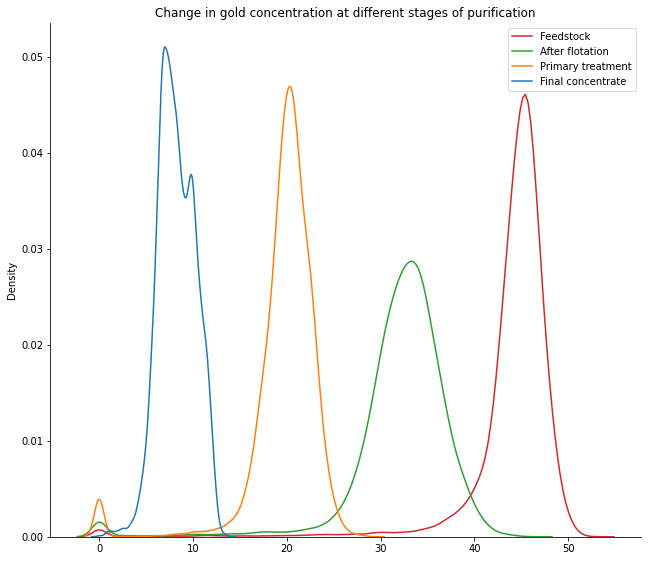

In [24]:
ax = sns.displot(AU, kind='kde', legend=False)
plt.legend(labels = ['Feedstock', 'After flotation', 'Primary treatment', 'Final concentrate'])
plt.title('Change in gold concentration at different stages of purification')
ax.fig.set_figwidth(10)
ax.fig.set_figheight(8)
plt.show()

As can be seen from the histogram, after passing through all stages of purification, the concentration of gold increases.

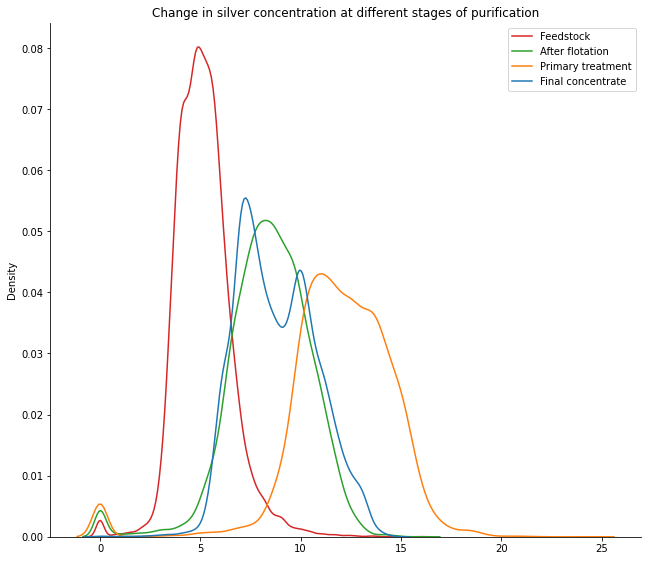

In [25]:
ax = sns.displot(AG, kind='kde', legend=False)
plt.legend(labels = ['Feedstock', 'After flotation', 'Primary treatment', 'Final concentrate'])
plt.title('Change in silver concentration at different stages of purification')
ax.fig.set_figwidth(10)
ax.fig.set_figheight(8)
plt.show()

The concentration of silver after treatment, on the contrary, decreased.

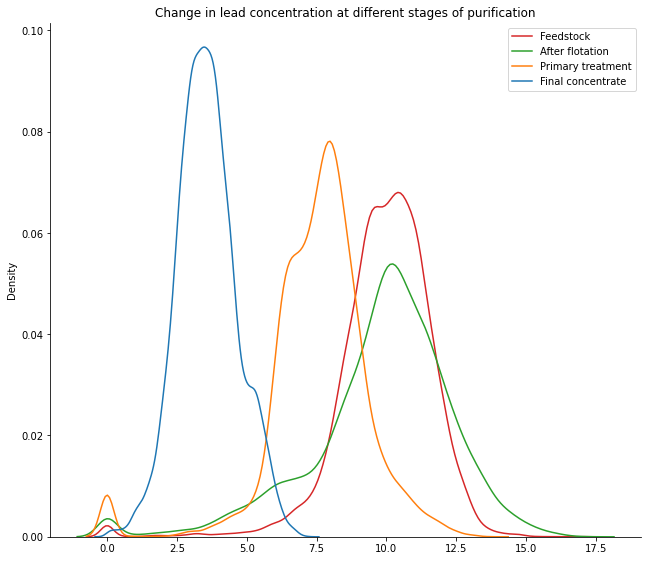

In [26]:
ax = sns.displot(PB, kind='kde', legend=False)
plt.legend(labels = ['Feedstock', 'After flotation', 'Primary treatment', 'Final concentrate'])
plt.title('Change in lead concentration at different stages of purification')
ax.fig.set_figwidth(10)
ax.fig.set_figheight(8)
plt.show()

Lead shows the same trend as gold and its concentration has increased after purification.

### Let us compare the size distributions of raw material granules on the training and test samples.

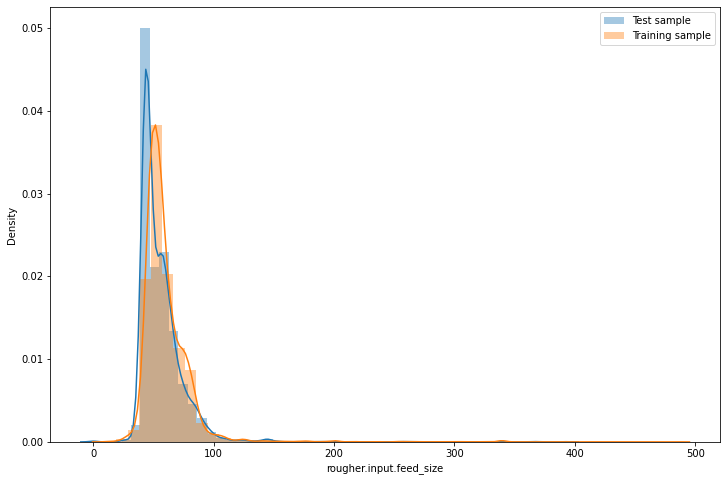

In [27]:
plt.figure(figsize=(12,8))
sns.distplot(df_test['rougher.input.feed_size'], label='Test sample')
sns.distplot(df_train['rougher.input.feed_size'], label='Training sample')
plt.legend()
plt.show()

The distributions on the training and test sets are similar, so the model will work correctly.

### The study of the total concentration of all substances at different stages.

In [28]:
#raw material
sum_feed = (df_full['rougher.input.feed_ag'] +
            df_full['rougher.input.feed_pb'] +
            df_full['rougher.input.feed_sol'] +
            df_full['rougher.input.feed_au'])

In [29]:
#flotation
sum_rougher = (df_full['rougher.output.concentrate_ag'] + 
               df_full['rougher.output.concentrate_pb'] + 
               df_full['rougher.output.concentrate_sol'] + 
               df_full['rougher.output.concentrate_au'])

In [30]:
#primary cleaning
sum_primary = (df_full['primary_cleaner.output.concentrate_ag'] + 
               df_full['primary_cleaner.output.concentrate_pb'] + 
               df_full['primary_cleaner.output.concentrate_sol'] + 
               df_full['primary_cleaner.output.concentrate_au'])

In [31]:
#final concentration
sum_final = (df_full['final.output.concentrate_ag'] + 
             df_full['final.output.concentrate_pb'] + 
             df_full['final.output.concentrate_sol'] + 
             df_full['final.output.concentrate_au'])

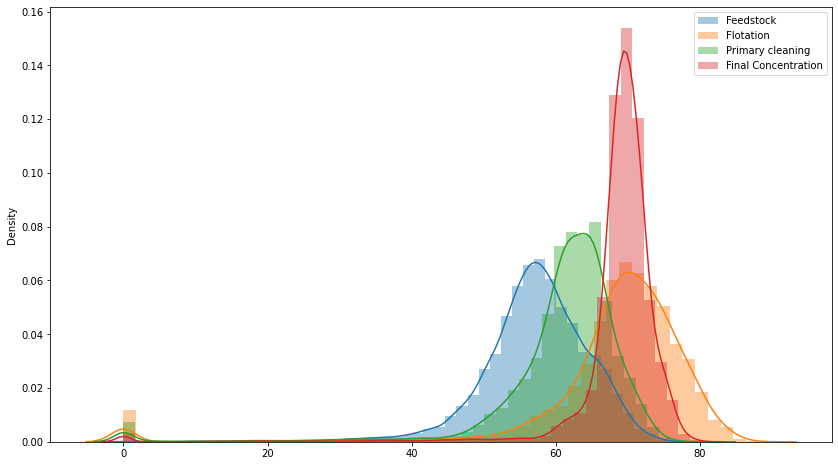

In [32]:
plt.figure(figsize=(14,8))
sns.distplot(sum_feed, label='Feedstock')
sns.distplot(sum_rougher, label='Flotation')
sns.distplot(sum_primary, label='Primary cleaning')
sns.distplot(sum_final, label='Final Concentration')
plt.legend()
plt.show()

The histogram shows that in the raw material and crude concentrate the concentration of all substances practically does not change, but in the final concentrate the concentration of all substances almost doubles.

The histogram also shows emissions near zero at the stage of flotation, primary purification and final concentration, but these data are not in the training and test samples, and there are no such emissions in the feedstock, so these emissions will not affect our models in any way. Let's check it out just in case.

In [33]:
train_feed = (df_train['rougher.input.feed_ag'] +
              df_train['rougher.input.feed_pb'] +
              df_train['rougher.input.feed_sol'] +
              df_train['rougher.input.feed_au'])

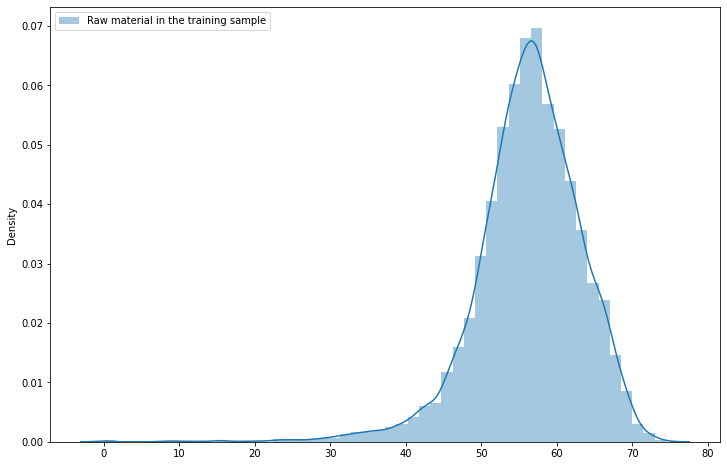

In [34]:
plt.figure(figsize=(12,8))
sns.distplot(train_feed, label='Raw material in the training sample')
plt.legend()
plt.show()

When checking, it turned out that there are small emissions near zero, so we will filter them out.

In [35]:
df_train = df_train[(df_train['rougher.input.feed_ag']>1)
                    &(df_train['rougher.input.feed_pb']>1)
                    &(df_train['rougher.input.feed_sol']>1)
                    &(df_train['rougher.input.feed_au']>1)]

In [36]:
test_feed = (df_test['rougher.input.feed_ag'] +
             df_test['rougher.input.feed_pb'] +
             df_test['rougher.input.feed_sol'] +
             df_test['rougher.input.feed_au'])

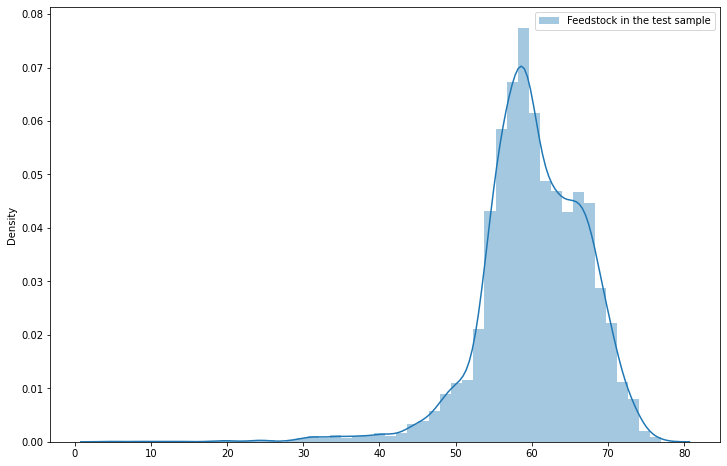

In [37]:
plt.figure(figsize=(12,8))
sns.distplot(test_feed, label='Feedstock in the test sample')
plt.legend()
plt.show()

There are no outliers in the test sample, so we leave it as it is.

### Section Conclusion

After analyzing the data, the following conclusions were drawn:
1. After passing through all stages of purification, the concentration of gold and lead increases, while the concentration of silver, on the contrary, decreases.
2. The distribution of raw material granule sizes on the training and test sets is similar, so the model will work correctly.
3. When studying the total concentration of all substances at different stages: in raw materials and rough concentrate, it practically does not change, but in the final concentrate, the concentration of all substances almost doubles.

## Model

### sMAPE

To solve the problem, we introduce a new quality metric - <b>sMAPE</b> (Symmetric Mean Absolute Percentage Error).
It is similar to MAE, but is expressed not in absolute terms, but in relative terms. Why symmetrical? It equally takes into account the scale of both the target feature and the prediction.

For regression problems, the smaller the value of the metric, the better.

In [38]:
#create a function to calculate sMAPE
def smape (target, predictions):
    return 1/len(target)*sum(abs(target-predictions)/((abs(target)+abs(predictions))/2))*100

In [39]:
#create a new metric to evaluate the quality of the model
smape_score = make_scorer(smape)

In [40]:
def total_smape (smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final

In [41]:
#create samples with features and target features (separately for flotation and separately for the final concentrate)
features_train = df_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis = 1) #common features for two target features
target_rougher_train = df_train['rougher.output.recovery'] #target feature for the flotation stage
target_final_train = df_train['final.output.recovery'] #target trait for final concentration

#### Decision tree

In [42]:
def tree(features, target):
    best_tree = None
    best_depth = 0
    best_smape = 20
    for depth in range(1, 10):
        model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
        model.fit(features, target)
        smape_score_tree = cross_val_score(model,
                                           features,
                                           target,
                                           cv=5,
                                           scoring=smape_score,
                                           n_jobs=-1).mean()
        if smape_score_tree < best_smape:
            best_tree = model
            best_smape = smape_score_tree
            best_depth = depth
    print('Best sMAPE result: {} with max_depth {}'
      .format(best_smape, best_depth))
    return best_tree, best_smape

In [43]:
#look at the results of the decision tree model for the flotation step
tree_rougher, tree_rougher_smape = tree(features_train, target_rougher_train)

Best sMAPE result: 11.531455970056712 with max_depth 4


In [44]:
#look at the results of the decision tree model at the final stage
tree_final, tree_final_smape = tree(features_train, target_final_train)

Best sMAPE result: 10.312148747789308 with max_depth 2


In [45]:
#final sMAPE of the decision tree
tree_total_smape = total_smape(tree_rougher_smape, tree_final_smape)
print('Final sMAPE for the decision tree:', tree_total_smape)

Final sMAPE for the decision tree: 10.61697555335616


#### Random forest

In [46]:
def forest(features, target):
    best_forest = None
    best_est = 0
    best_depth = 0
    best_smape = 20
    for depth in range(1, 10):
        for est in range(1,10):
            model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
            model.fit(features, target)
            smape_score_forest = cross_val_score(model,
                                                 features,
                                                 target,
                                                 cv=5,
                                                 scoring=smape_score,
                                                 n_jobs=-1).mean()
            if smape_score_forest < best_smape:
                best_forest = model
                best_smape = smape_score_forest
                best_depth = depth
                best_est = est
    print('Best sMAPE result: {} with max_depth {} and n_estimators {}'
      .format(best_smape, best_depth, best_est))
    return (best_forest, best_smape)

In [47]:
#look at the results of the random forest model for the flotation stage
forest_rougher, forest_rougher_smape = forest(features_train, target_rougher_train)

Best sMAPE result: 10.901806523121152 with max_depth 5 and n_estimators 6


In [48]:
#look at the results of the random forest model at the final stage
forest_final, forest_final_smape = forest(features_train, target_final_train)

Best sMAPE result: 10.021508844838745 with max_depth 5 and n_estimators 7


In [49]:
#final sMAPE by random forest
forest_total_smape = total_smape(forest_rougher_smape, forest_final_smape)
print('Final sMAPE for Random Forest:',forest_total_smape)

Final sMAPE for Random Forest: 10.241583264409346


#### Linear regression

In [50]:
def reg_model(features, target):
    regression_model = LinearRegression()
    regression_model.fit(features, target)
    smape_score_regression = cross_val_score(regression_model,
                                             features,
                                             target,
                                             cv=5,
                                             scoring=smape_score,
                                             n_jobs=-1).mean()
    print('Best sMAPE result:', smape_score_regression)
    return (regression_model, smape_score_regression)

In [51]:
#look at the results of the linear regression model for the flotation stage
regression_rougher, regression_rougher_smape = reg_model(features_train, target_rougher_train)

Best sMAPE result: 12.774081397480378


In [52]:
#look at the results of the linear regression model at the final stage
regression_final, regression_final_smape = reg_model(features_train, target_final_train)

Best sMAPE result: 11.971313778991808


In [53]:
#final sMAPE by linear regression
regression_total_smape = total_smape(regression_rougher_smape, regression_final_smape)
print('Final sMAPE for linear regression:', regression_total_smape)

Final sMAPE for linear regression: 12.172005683613952


The best result of the final sMAPE among the three models was demonstrated by the random forest with a score of 10.241.

### Model validation on a test set

So, we have determined that our best model turned out to be a random forest. Let's check the results of his work on a test sample.

In [54]:
#to start, prepare a test sample
features_test = df_test #common features for two target features

#target features will be taken from the full dataset, because they are not in the test sample
target_rougher_test = df_full['rougher.output.recovery'][df_test.index] #target feature for the flotation stage
target_final_test = df_full['final.output.recovery'][df_test.index] #target trait for final concentration

We will use random forest models with parameters that showed the best result on the training set.

In [55]:
forest_model_rougher = RandomForestRegressor(random_state=12345, n_estimators=6, max_depth=5)
forest_model_rougher.fit(features_test, target_rougher_test)
smape_forest_model_rougher = cross_val_score(forest_model_rougher,
                                             features_test,
                                             target_rougher_test,
                                             cv=5,
                                             scoring=smape_score,
                                             n_jobs=-1).mean()
print('sMAPE of a random forest on a test set:', smape_forest_model_rougher)

sMAPE of a random forest on a test set: 12.098099816552534


In [56]:
forest_model_final = RandomForestRegressor(random_state=12345, n_estimators=7, max_depth=5)
forest_model_final.fit(features_test, target_final_test)
smape_forest_model_final = cross_val_score(forest_model_final,
                                             features_test,
                                             target_final_test,
                                             cv=5,
                                             scoring=smape_score,
                                             n_jobs=-1).mean()
print('sMAPE of a random forest on a test set:', smape_forest_model_final)

sMAPE of a random forest on a test set: 13.132207921468947


In [57]:
forest_total_test_smape = total_smape(smape_forest_model_rougher, smape_forest_model_final)
print('The final sMAPE of the random forest on the test set:', forest_total_test_smape)

The final sMAPE of the random forest on the test set: 12.873680895239843


The result of sMAPE turned out to be worse than on the training sample - 12.873. Let's try to check the linear regression indicator on the test sample.

In [58]:
#look at the results of the test sample for the flotation stage
regression_test_rougher, regression_test_rougher_smape = reg_model(features_test, target_rougher_test)

Best sMAPE result: 12.99859233173789


In [59]:
#look at the results of the test sample at the final stage
regression_test_final, regression_test_final_smape = reg_model(features_test, target_final_test)

Best sMAPE result: 10.41710705921383


In [60]:
regression_total_test_smape = total_smape(regression_test_rougher_smape, regression_test_final_smape)
print('Final sMAPE on the test set:', regression_total_test_smape)

Final sMAPE on the test set: 11.062478377344846


The final sMAPE of the linear regression on the test set was 11.062. The result is good and better than random forest, so we will use linear regression.

### Checking the model for adequacy

Let's compare our model with the constant model from DummyRegressor, which predicts the mean from the target values, to make sure it works adequately.

In [61]:
#train the dummy model
dummy_rougher = DummyRegressor(strategy='mean')
dummy_rougher.fit(features_train, target_rougher_train)
dummy_rougher_predict = dummy_rougher.predict(features_test)

dummy_final = DummyRegressor(strategy='mean')
dummy_final.fit(features_train, target_final_train)
dummy_final_predict = dummy_rougher.predict(features_test)

In [62]:
#and check the resulting sMAPE result
smape_dummy_rougher_test = smape(target_rougher_test, dummy_rougher_predict)
smape_dummy_final_test = smape(target_final_test, dummy_final_predict)

dummy_total_test_smape = total_smape(smape_dummy_rougher_test, smape_dummy_final_test)
print('The final sMAPE Dummy model is:', dummy_total_test_smape)

The final sMAPE Dummy model is: 17.854900797328266


The final sMAPE Dummy of the model was 17.854, which means that our model works adequately, because the final sMAPE on it was 11.062.

### Section Conclusion

1. To solve the problem, a new quality metric was introduced - sMAPE (Symmetric Mean Absolute Percentage Error).
2. 3 models were trained: decision tree, random forest and linear regression.
3. The following sMAPE results were obtained for 3 models:
    1. Decision tree - 10.616;
    2. Random forest - 10.241;
    3. Linear regression - 12.172.
4. Based on the results of testing the model on the test sample, linear regression was recognized as the best and we got the sMAPE indicator - 11.062, which is a good result.
5. Based on the test, our model works adequately.

## General Conclusion

1. The enrichment efficiency in the training sample is calculated correctly, because the MAE index was 9.73, which is good. result and indicates the correctness of the calculations.
2. In the test sample at all stages, there are no output parameters of the product (output): metal concentration (concentrate) and tailings (tail) for metals (Au, Ag, Pb) and salts (Sol). These data are not suitable for training the model, as they appear during or after the measurement of the target features. Also, in the test sample, there are no calculated signs at the flotation stage - calculation. The column data was removed from the training dataset, and the final.output.recovery and rougher.output.recovery columns were assigned as target features.
3. After passing through all stages of purification, the concentration of gold and lead increases, while the concentration of silver, on the contrary, decreases.
4. The distribution of raw material granule sizes on the training and test sets is similar, so the model will work correctly.
5. In the study of the total concentration of all substances at different stages: in raw materials and rough concentrate, it practically does not change, but in the final concentrate, the concentration of all substances almost doubles.
6. To solve the problem, a new quality metric was introduced - sMAPE (Symmetric Mean Absolute Percentage Error).
7. Linear regression was recognized as the best and, based on the results of checking the model on the test sample, we got the result sMAPE - 11.062, which is a good result.